#### Packages preparation

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from feature_engine.outliers import Winsorizer

# Disables warning messages for beauty
import warnings
warnings.filterwarnings("ignore")

# I. Exploring dataset, descriptive statistics.

In [266]:
# Importing all files as dataframes
codes_df=pd.read_csv('codes.csv', sep=';', encoding = "ISO-8859-1")
transactions_df=pd.read_csv('transactions.csv', sep=';')
types_df=pd.read_csv('types.csv', sep=';', encoding = "ISO-8859-1")
train_df=pd.read_csv('train_set.csv', sep=';', encoding = "ISO-8859-1")
df4=pd.read_csv('train_set.csv', encoding = "ISO-8859-1")
df5=pd.read_csv('test_set.csv', encoding = "ISO-8859-1")

transactions_df

,client_id,datetime,code,type,sum
0,96372458,421 06:33:15,6011,2010,-561478.94
1,24567813,377 17:20:40,6011,7010,67377.47
2,21717441,55 13:38:47,6011,2010,-44918.32
3,14331004,263 12:57:08,6011,2010,-3368873.66
4,85302434,151 10:34:12,4814,1030,-3368.87
...,...,...,...,...,...
130034,15836839,147 11:50:53,5411,1010,-26344.59
130035,28369355,305 11:59:34,4829,2330,-24705.07
130036,40949707,398 21:13:58,5411,1110,-40353.72
130037,7174462,409 13:58:14,5411,1010,-25536.06


In [267]:
transactions_df.shape

(130039, 5)

# II. Explanatory data analysis

In [268]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130039 entries, 0 to 130038
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   client_id  130039 non-null  int64  
 1   datetime   130039 non-null  object 
 2   code       130039 non-null  int64  
 3   type       130039 non-null  int64  
 4   sum        130039 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 5.0+ MB


In [269]:
transactions_df.isnull().sum()

client_id    0
datetime     0
code         0
type         0
sum          0
dtype: int64

In [270]:
transactions_df.describe()

,client_id,code,type,sum
count,1.300390e+05,130039.000000,130039.000000,1.300390e+05
mean,5.086859e+07,5594.629996,2489.372135,-1.812909e+04
std,2.872854e+07,606.087084,2253.296578,5.584445e+05
min,2.289900e+04,742.000000,1000.000000,-4.150030e+07
25%,2.577174e+07,5211.000000,1030.000000,-2.244916e+04
50%,5.235837e+07,5641.000000,1110.000000,-5.502490e+03
75%,7.506302e+07,6010.000000,2370.000000,-1.122960e+03
max,9.999968e+07,9402.000000,8145.000000,6.737747e+07


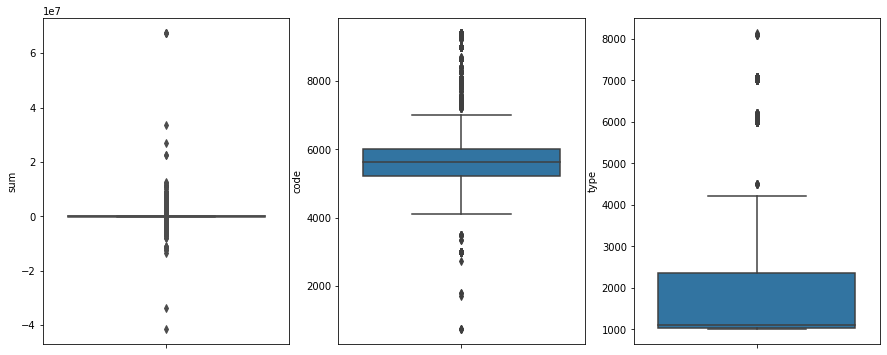

In [271]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=transactions_df['sum'], color="red")
plt.subplot(1,3,2)
sns.boxplot(y=transactions_df["code"])
plt.subplot(1,3,3)
sns.boxplot(y=transactions_df["type"])
plt.show()

##### Data cleaning. Removing outliers

In [272]:
for col_name in ['sum', 'code', 'type']:
    Q1 = np.percentile(transactions_df[col_name], 25,interpolation = 'midpoint')
    Q3 = np.percentile(transactions_df[col_name], 75,interpolation = 'midpoint')
    IQR = Q3 - Q1
    upper = np.where(transactions_df[col_name] >= (Q3+1.5*IQR))
    lower = np.where(transactions_df[col_name] <= (Q1-1.5*IQR))
    transactions_df.drop(upper[0], inplace = True)
    transactions_df.drop(lower[0], inplace = True)
    transactions_df.reset_index(drop=True, inplace=True)

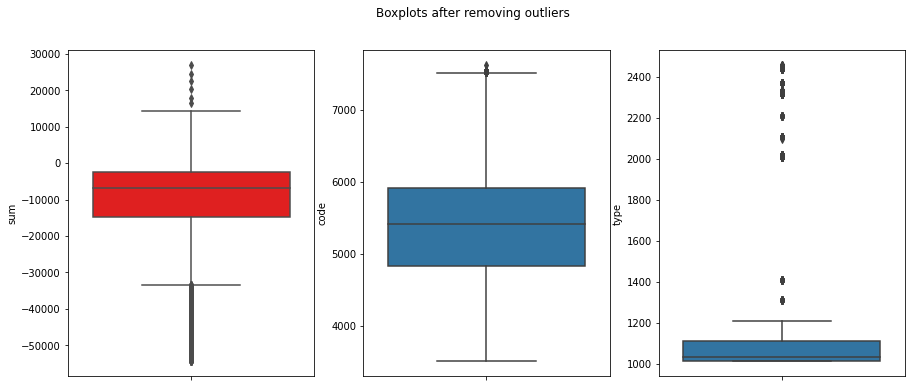

In [273]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(y=transactions_df['sum'], color="red")
plt.subplot(1,3,2)
sns.boxplot(y=transactions_df["code"])
plt.subplot(1,3,3)
sns.boxplot(y=transactions_df["type"])

plt.suptitle('Boxplots after removing outliers')
plt.show()

In [274]:
transactions_df

,client_id,datetime,code,type,sum
0,21717441,55 13:38:47,6011,2010,-44918.32
1,85302434,151 10:34:12,4814,1030,-3368.87
2,31421357,398 00:00:00,5411,1110,-1572.14
3,92322336,66 13:21:29,4814,1030,-4491.83
4,91101111,346 11:06:20,4814,1030,-4491.83
...,...,...,...,...,...
83634,15836839,147 11:50:53,5411,1010,-26344.59
83635,28369355,305 11:59:34,4829,2330,-24705.07
83636,40949707,398 21:13:58,5411,1110,-40353.72
83637,7174462,409 13:58:14,5411,1010,-25536.06


In [275]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83639 entries, 0 to 83638
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   client_id  83639 non-null  int64  
 1   datetime   83639 non-null  object 
 2   code       83639 non-null  int64  
 3   type       83639 non-null  int64  
 4   sum        83639 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.2+ MB


In [276]:
transactions_df.describe()

,client_id,code,type,sum
count,8.363900e+04,83639.000000,83639.000000,83639.000000
mean,5.056450e+07,5423.835651,1273.610732,-11024.573416
std,2.884092e+07,488.542784,445.767188,11750.054299
min,2.289900e+04,3501.000000,1010.000000,-54422.360000
25%,2.551941e+07,4829.000000,1010.000000,-14780.710000
50%,5.094609e+07,5411.000000,1030.000000,-6737.750000
75%,7.521526e+07,5912.000000,1110.000000,-2290.830000
max,9.999968e+07,7629.000000,2460.000000,26950.990000


# III. Feature engineering. RFM Analysis
To understand the behavior of the customer RFM metrics plays a vital role as frequency and monetary value affect a customer’s lifetime value, and recency affects retention, a measure of engagement

##### Recency.
Calculating Recency, here we are calculating recency by subtracting the very recent date with the last transaction date of the customers.

In [277]:
# obtaining day number from datetime column
day_number=[int(i.split()[0]) for i in transactions_df['datetime']]
latest_purchase_day=max(day_number)
day_number=pd.DataFrame(day_number, columns=['day_number'])

#adding new column day_number to dataframe
transactions_df['day_number']=day_number

df_recency=transactions_df.groupby('client_id', as_index=False)['day_number'].max()
df_recency.columns=['client_id', 'Last_purchase_day']

df_recency['Recency']=df_recency.Last_purchase_day.apply(lambda x:(latest_purchase_day-x))
df_recency

,client_id,Last_purchase_day,Recency
0,22899,231,225
1,27914,261,195
2,28753,424,32
3,31385,314,142
4,38084,398,58
...,...,...,...
8204,99900908,311,145
8205,99911226,446,10
8206,99938948,438,18
8207,99991245,292,164


##### Frequency-Monetary

In [278]:
FM_table=transactions_df.groupby('client_id').agg({'code':lambda x:len(x),
                                                   'sum': lambda x:x.sum()})
FM_table.rename(columns={'code':'Frequency',
                         'sum':'Monetary'}, inplace=True)
FM_table

,Frequency,Monetary
client_id,,
22899,4,-16979.13
27914,2,-4491.84
28753,7,-77069.71
31385,10,-65558.06
38084,13,-229648.28
...,...,...
99900908,5,-72052.13
99911226,7,-117427.71
99938948,17,-158763.79


#### RFM table

In [279]:
RFM_table=df_recency.merge(FM_table, left_on='client_id', right_on='client_id')
RFM_table.drop('Last_purchase_day', axis=1, inplace=True)
RFM_table

,client_id,Recency,Frequency,Monetary
0,22899,225,4,-16979.13
1,27914,195,2,-4491.84
2,28753,32,7,-77069.71
3,31385,142,10,-65558.06
4,38084,58,13,-229648.28
...,...,...,...,...
8204,99900908,145,5,-72052.13
8205,99911226,10,7,-117427.71
8206,99938948,18,17,-158763.79
8207,99991245,164,1,-16574.86


Now we split the metrics into segments using quantiles. We will assign a score from 1 to 4 to each Recency, Frequency and Monetary respectively. 1 is the highest value, and 4 is the lowest value. A final RFM score (Overall Value) is calculated simply by combining individual RFM score numbers.

We will calculate quartile values for each R, F, M values

In [280]:
quantiles=RFM_table.quantile(q=[0.25,0.5,0.75])
quantiles=quantiles.to_dict()
quantiles

{'client_id': {0.25: 25336182.0, 0.5: 50501881.0, 0.75: 75328477.0},
 'Recency': {0.25: 12.0, 0.5: 34.0, 0.75: 87.0},
 'Frequency': {0.25: 4.0, 0.5: 8.0, 0.75: 14.0},
 'Monetary': {0.25: -157869.92, 0.5: -82458.8, 0.75: -35373.17}}

Converting rfm scores to relative score to reduce the bias associated with the actual customer lifetime.

In [281]:
def Rscore(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<= d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4

def FMscore(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<= d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1

The resulting table has our Recency, Frequency and Monetary columns, along with the quartile for each value

In [282]:
segmented_rfm=RFM_table.copy()
segmented_rfm['R_quartile']=segmented_rfm['Recency'].apply(Rscore, args=('Recency', quantiles))
segmented_rfm['F_quartile'] = segmented_rfm['Frequency'].apply(FMscore, args=('Frequency',quantiles))
segmented_rfm['M_quartile'] = segmented_rfm['Monetary'].apply(FMscore, args=('Monetary',quantiles))
segmented_rfm.head()
segmented_rfm

,client_id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile
0,22899,225,4,-16979.13,4,4,1
1,27914,195,2,-4491.84,4,4,1
2,28753,32,7,-77069.71,2,3,2
3,31385,142,10,-65558.06,4,2,2
4,38084,58,13,-229648.28,3,2,4
...,...,...,...,...,...,...,...
8204,99900908,145,5,-72052.13,4,3,2
8205,99911226,10,7,-117427.71,1,3,3
8206,99938948,18,17,-158763.79,2,1,4
8207,99991245,164,1,-16574.86,4,4,1


Calculating the total RFM score combined

RFM_Score = R_quartile + F_quartile + M_quartile

In [283]:
segmented_rfm['RFM_segment']=segmented_rfm['R_quartile'].map(str)+segmented_rfm['F_quartile'].map(str)+segmented_rfm['M_quartile'].map(str)

segmented_rfm['RFM_score']=segmented_rfm['R_quartile']+segmented_rfm['F_quartile']+segmented_rfm['M_quartile']
segmented_rfm

,client_id,Recency,Frequency,Monetary,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_score
0,22899,225,4,-16979.13,4,4,1,441,9
1,27914,195,2,-4491.84,4,4,1,441,9
2,28753,32,7,-77069.71,2,3,2,232,7
3,31385,142,10,-65558.06,4,2,2,422,8
4,38084,58,13,-229648.28,3,2,4,324,9
...,...,...,...,...,...,...,...,...,...
8204,99900908,145,5,-72052.13,4,3,2,432,9
8205,99911226,10,7,-117427.71,1,3,3,133,7
8206,99938948,18,17,-158763.79,2,1,4,214,7
8207,99991245,164,1,-16574.86,4,4,1,441,9


In [284]:
print("Best Customers: ",len(segmented_rfm[segmented_rfm['RFM_segment']=='111']))
print('Loyal Customers: ',len(segmented_rfm[segmented_rfm['F_quartile']==1]))
print("Big Spenders: ",len(segmented_rfm[segmented_rfm['M_quartile']==1]))
print('Almost Lost: ', len(segmented_rfm[segmented_rfm['RFM_segment']=='134']))
print('Lost Customers: ',len(segmented_rfm[segmented_rfm['RFM_segment']=='344']))
print('Lost Cheap Customers: ',len(segmented_rfm[segmented_rfm['RFM_segment']=='444']))

Best Customers:  3
Loyal Customers:  1940
Big Spenders:  2052
Almost Lost:  25
Lost Customers:  0
Lost Cheap Customers:  0


In [285]:
segmented_rfm['RFM_score'].unique()

array([ 9,  7,  8,  6,  5, 10, 11,  4,  3])

In [286]:
segmented_rfm.groupby('RFM_score').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency  Monetary      
             mean      mean      mean count
RFM_score                                  
3             8.0      17.3  -28797.4     3
4             6.3      15.1  -50059.5    43
5             7.3      14.4  -82057.2   462
6             9.4      16.5 -167594.3  1664
7            25.4      12.6 -139825.7  1791
8            53.7       8.5 -102774.6  1722
9           154.9       4.5  -60733.9  1815
10          163.3       4.6  -88264.7   630
11          154.9       4.4 -124224.8    79

# IV. Cluster analysis
## K-Means Clustering


K-means gives the best result under the following conditions:

* Data’s distribution is not skewed (i.e. long-tail distribution)
* Data is standardised (i.e. mean of 0 and standard deviation of

Plotting distribution charts to check for skewness.

#### Reducing skewness and standardising

In [287]:
## Function to check skewness
def check_skew(df_skew, column):
    skew=stats.skew(df_skew[column])
    skewtest=stats.skewtest(df_skew[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df_skew[column])
    print("{}'s : Skew: {}, : {}".format(column,skew,skewtest))
    return

Recency's : Skew: 2.1018775668886467, : SkewtestResult(statistic=50.64761575465411, pvalue=0.0)
Frequency's : Skew: 2.2941433714974817, : SkewtestResult(statistic=53.13042843540102, pvalue=0.0)
Monetary's : Skew: -2.7468462779542087, : SkewtestResult(statistic=-58.312735228028515, pvalue=0.0)


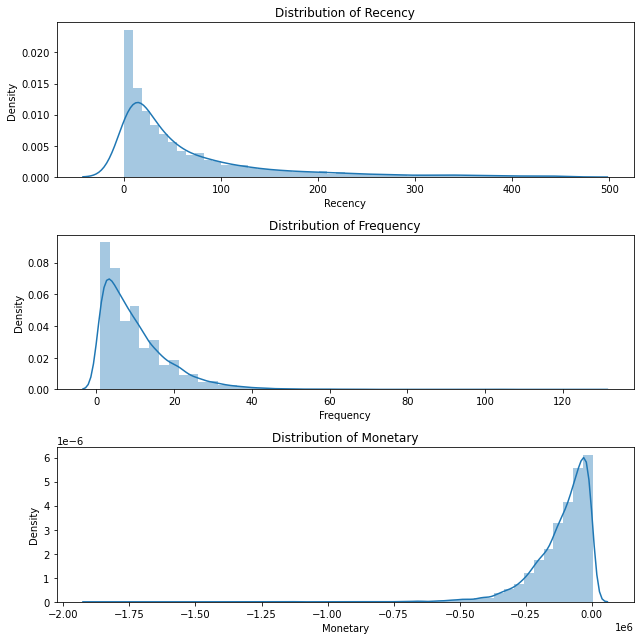

In [288]:
plt.figure(figsize=(9,9))

plt.subplot(3,1,1)
check_skew(RFM_table, 'Recency')

plt.subplot(3, 1, 2)
check_skew(RFM_table,'Frequency')

plt.subplot(3, 1, 3)
check_skew(RFM_table,'Monetary')

plt.tight_layout()

The data is highly skewed,so we performed log transformations to reduce the skewness of each variable. We added a constant(minimum value) to Monetary table because it has negative values, when logarithmic function requires all the values to be positive.

In [289]:
df_rfm_log = RFM_table.copy()
df_rfm_log['Monetary']=df_rfm_log['Monetary']-df_rfm_log['Monetary'].min()
df_rfm_log

,client_id,Recency,Frequency,Monetary
0,22899,225,4,1855273.59
1,27914,195,2,1867760.88
2,28753,32,7,1795183.01
3,31385,142,10,1806694.66
4,38084,58,13,1642604.44
...,...,...,...,...
8204,99900908,145,5,1800200.59
8205,99911226,10,7,1754825.01
8206,99938948,18,17,1713488.93
8207,99991245,164,1,1855677.86


Recency's : Skew: -0.3865010234840842, : SkewtestResult(statistic=-13.823683914319226, pvalue=1.8343671682599972e-43)
Frequency's : Skew: -0.10367184210094746, : SkewtestResult(statistic=-3.8279751637164647, pvalue=0.00012920179004215405)
Monetary's : Skew: -70.31373660254671, : SkewtestResult(statistic=-155.8158139439283, pvalue=0.0)


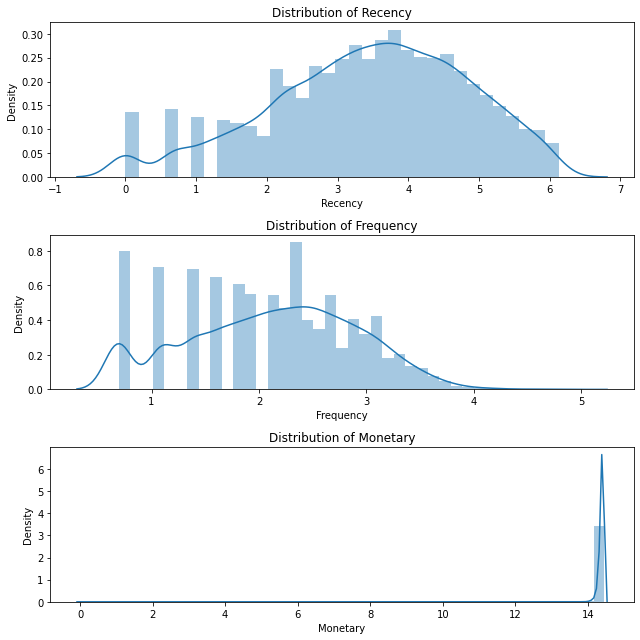

In [290]:
#Removing Skewness
df_rfm_log = np.log(df_rfm_log+1)

plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(df_rfm_log,'Recency')

plt.subplot(3, 1, 2)
check_skew(df_rfm_log,'Frequency')
plt.subplot(3, 1, 3)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()

In [291]:
RFM_table.describe()

,client_id,Recency,Frequency,Monetary
count,8.209000e+03,8209.000000,8209.000000,8.209000e+03
mean,5.039734e+07,67.417347,10.188695,-1.123260e+05
std,2.888839e+07,85.245893,8.995130,1.090199e+05
min,2.289900e+04,0.000000,1.000000,-1.872253e+06
25%,2.533618e+07,12.000000,4.000000,-1.578699e+05
50%,5.050188e+07,34.000000,8.000000,-8.245880e+04
75%,7.532848e+07,87.000000,14.000000,-3.537317e+04
max,9.999968e+07,456.000000,127.000000,5.319220e+03


In [292]:
windsoriser = Winsorizer(tail='both', # cap left, right or both tails
                          fold=2,
                           variables=[ 'Recency', 'Frequency', 'Monetary']
                        )
windsoriser.fit(df_rfm_log)

Winsorizer(fold=2, tail='both', variables=['Recency', 'Frequency', 'Monetary'])

In [293]:
df_rfm_log = windsoriser.transform(df_rfm_log)

**Once the skewness is reduced, we standardised the data by centring and scaling**

In [294]:
scaler=StandardScaler()

scaler.fit(df_rfm_log)

RFM_table_scaled=scaler.transform(df_rfm_log)


In [295]:
RFM_table_scaled=pd.DataFrame(RFM_table_scaled, columns=df_rfm_log.columns)

RFM_table_scaled

,client_id,Recency,Frequency,Monetary
0,-7.320100,1.449275,-0.659438,0.870921
1,-7.123929,1.343643,-1.316866,0.978685
2,-7.094594,0.022228,-0.054547,0.341990
3,-7.007831,1.109807,0.355300,0.444675
4,-6.816187,0.453177,0.665673,-1.084935
...,...,...,...,...
8204,0.982098,1.125207,-0.424792,0.386828
8205,0.982200,-0.792611,-0.054547,-0.023285
8206,0.982475,-0.387240,0.989113,-0.406227
8207,0.982994,1.215945,-1.838696,0.874421


In [296]:
RFM_table_scaled.describe()

,client_id,Recency,Frequency,Monetary
count,8.209000e+03,8.209000e+03,8.209000e+03,8.209000e+03
mean,-1.211792e-17,8.157955e-17,-2.531779e-17,-2.530887e-14
std,1.000061e+00,1.000061e+00,1.000061e+00,1.000061e+00
min,-7.320100e+00,-2.070669e+00,-1.838696e+00,-5.593593e+00
25%,-3.769803e-01,-6.687068e-01,-6.594378e-01,-3.978488e-01
50%,3.063277e-01,6.586998e-02,9.703849e-02,2.936914e-01
75%,7.024254e-01,7.497072e-01,7.544666e-01,7.108539e-01
max,9.830771e-01,1.971541e+00,2.018764e+00,1.062849e+00


##### Finding the optimal number of clusters

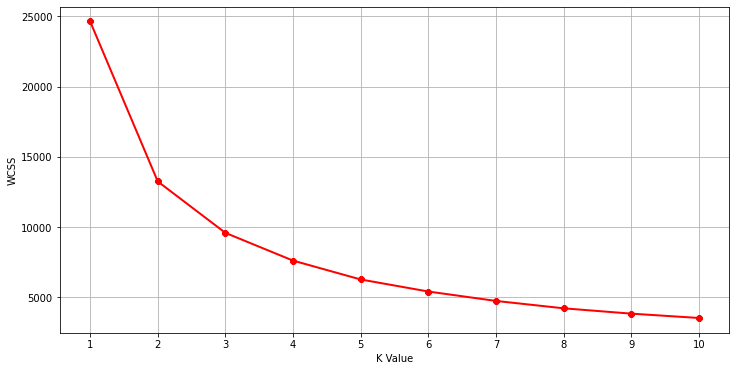

In [297]:
#elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(RFM_table_scaled.iloc[:, 1:])
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

**From the graph we see that the optimal number of clusters is 3**

In [298]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(RFM_table_scaled.iloc[:, 1:])
RFM_table_scaled["label"] = clusters

RFM_table_scaled.head()

,client_id,Recency,Frequency,Monetary,label
0,-7.320100,1.449275,-0.659438,0.870921,1
1,-7.123929,1.343643,-1.316866,0.978685,1
2,-7.094594,0.022228,-0.054547,0.341990,0
3,-7.007831,1.109807,0.355300,0.444675,1
4,-6.816187,0.453177,0.665673,-1.084935,2


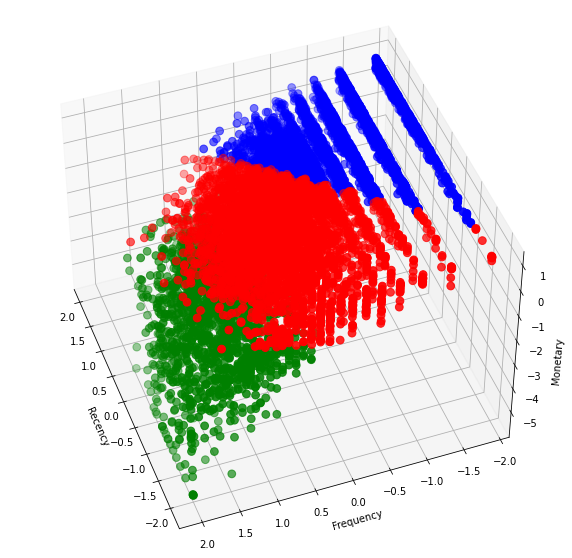

In [299]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM_table_scaled['Recency'][RFM_table_scaled.label == 0], RFM_table_scaled["Frequency"][RFM_table_scaled.label == 0], RFM_table_scaled['Monetary'][RFM_table_scaled.label == 0], c='red', s=60)
ax.scatter(RFM_table_scaled['Recency'][RFM_table_scaled.label == 1], RFM_table_scaled["Frequency"][RFM_table_scaled.label == 1], RFM_table_scaled['Monetary'][RFM_table_scaled.label == 1], c='blue', s=60)
ax.scatter(RFM_table_scaled['Recency'][RFM_table_scaled.label == 2], RFM_table_scaled["Frequency"][RFM_table_scaled.label == 2], RFM_table_scaled['Monetary'][RFM_table_scaled.label == 2], c='green', s=60)

ax.view_init(45, 160)
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
plt.show()

## Hierarchical clustering

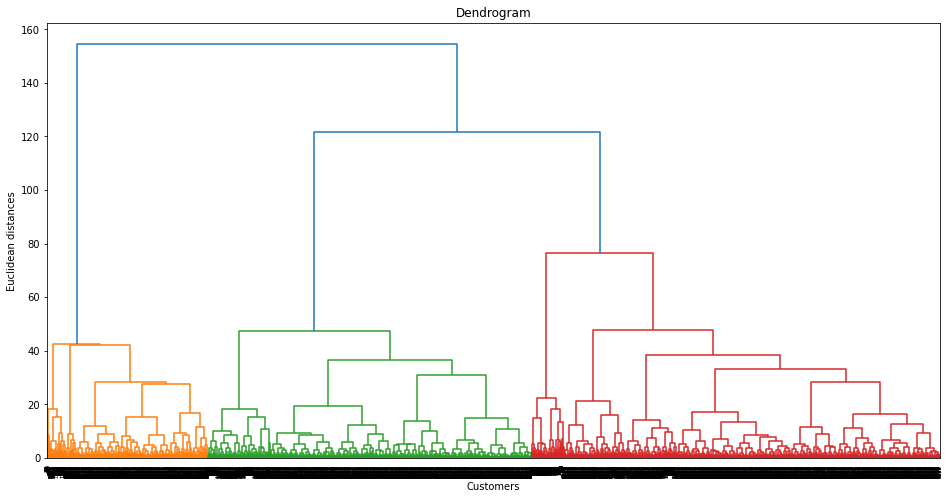

In [300]:
import scipy.cluster.hierarchy as model

plt.figure(1, figsize = (16 ,8))
dendrogram = model.dendrogram(model.linkage(RFM_table_scaled, method  ="ward"))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [301]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
RFM_table_scaled["label"] = cluster.fit_predict(RFM_table_scaled)
RFM_table_scaled.head()

,client_id,Recency,Frequency,Monetary,label
0,-7.320100,1.449275,-0.659438,0.870921,0
1,-7.123929,1.343643,-1.316866,0.978685,0
2,-7.094594,0.022228,-0.054547,0.341990,0
3,-7.007831,1.109807,0.355300,0.444675,0
4,-6.816187,0.453177,0.665673,-1.084935,1


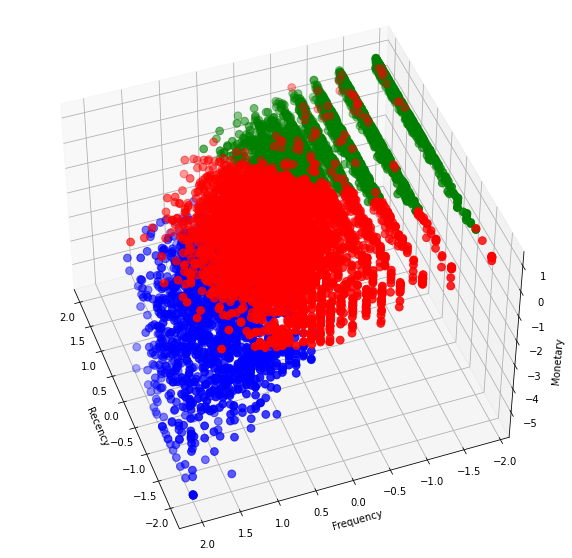

In [302]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(RFM_table_scaled['Recency'][RFM_table_scaled.label == 0], RFM_table_scaled["Frequency"][RFM_table_scaled.label == 0], RFM_table_scaled['Monetary'][RFM_table_scaled.label == 0], c='red', s=60)
ax.scatter(RFM_table_scaled['Recency'][RFM_table_scaled.label == 1], RFM_table_scaled["Frequency"][RFM_table_scaled.label == 1], RFM_table_scaled['Monetary'][RFM_table_scaled.label == 1], c='blue', s=60)
ax.scatter(RFM_table_scaled['Recency'][RFM_table_scaled.label == 2], RFM_table_scaled["Frequency"][RFM_table_scaled.label == 2], RFM_table_scaled['Monetary'][RFM_table_scaled.label == 2], c='green', s=60)

ax.view_init(45, 160)
plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
plt.show()

# V. Analyzing the results
Both KMeans and Hierarchical clustering algorithms gave us pretty much similar 3d graphs, where all dots represented as customers.
In both clustering we used standardized and scaled hand-made RFM table.
Each axes in these graphs corresponds to 3 main features of RFM: Recency, Frequency, Monetary.

# VI. Conclusion
In this project, we have gone through all the steps of proper data clustering:
1. Explored datasets
2. Cleaned them: removed nulls and outliers
3. Generated proper features (Recency, Frequency, Monetary) from columns
4. Prepared this features to use in K Means and Hierarchical clustering algorithms and predicted customers with them
5. Analyzed all outcoming graphs, visualizations and evaluted clusters